# Titanic

In [22]:
import matplotlib 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline 

# Wyświtla wszystkie outputy nie tylko ostatni (default)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [11]:
train = pd.read_csv("train.csv")
train.head()
test = pd.read_csv("test.csv")
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [41]:
train['Age'] = train['Age'].fillna(-1)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [44]:
train['Cabin'] = train['Cabin'].fillna(-1)
train['Embarked'] = train['Embarked'].fillna(-1)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [47]:
train['Sex'].nunique()
train['Sex'].unique()
train['Sex'].value_counts()


2

array(['male', 'female'], dtype=object)

male      577
female    314
Name: Sex, dtype: int64

In [100]:
# LEGEND
# 0 - male
# 1 - female
train['Sex_cat'] = train['Sex'].factorize()[0]
train['Sex_cat'].nunique()
train['Sex_cat'].unique()
train['Sex_cat'].value_counts()

#/////////////////////////////////////////////
#Function of display feature basic info
def feature_basic(vfeature):
    print(train[vfeature].count())
    print(train[vfeature].nunique())
    print(train[vfeature].unique())
    print(train[vfeature].value_counts())
    
#Function of changing text features for categorical features
def cat_for_num_feat(vcategorical, vstring):
    train[vcategorical] = train[vstring].factorize()[0]
    print(train[vcategorical].count())
    print(train[vcategorical].nunique())
    print(train[vcategorical].unique())
    print(train[vcategorical].value_counts())
#/////////////////////////////////////////////

2

array([0, 1], dtype=int64)

0    577
1    314
Name: Sex_cat, dtype: int64

In [70]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
Sex_cat        891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [90]:
feature_basic('Ticket')
cat_for_num_feat('Ticket_cat','Ticket')

891
681
['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151' '347082'
 '350406' '248706' '382652' '244373' '345763' '2649' '239865' '248698'
 '330923' '113788' '347077' '2631' '19950' '330959' '349216' 'PC 17601'
 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' '2677' 'A./5. 2152'
 '345764' '2651' '7546' '11668' '349253' 'SC/Paris 2123' '330958'
 'S.C./A.4. 23567' '370371' '14311' '2662' '349237' '3101295' 'A/4. 39886'
 'PC 17572' '2926' '113509' '19947' 'C.A. 31026' '2697' 'C.A. 34651'
 'CA 2144' '2669' '113572' '36973' '347088' 'PC 17605' '2661' 'C.A. 29395'
 'S.P. 3464' '3101281' '315151' 'C.A. 33111' 'S.O.C. 14879' '2680' '1601'
 '348123' '349208' '374746' '248738' '364516' '345767' '345779' '330932'
 '113059' 'SO/C 14885' '3101278' 'W./C. 6608' 'SOTON/OQ 392086' '343275'
 '343276' '347466' 'W.E.P. 5734' 'C.A. 2315' '364500' '374910' 'PC 17754'
 'PC 17759' '231919' '244367' '349245' '349215' '3

#1 Jak Dla mnie szum

In [91]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
Sex_cat        891 non-null int64
Ticket_cat     891 non-null int64
dtypes: float64(2), int64(7), object(5)
memory usage: 97.5+ KB


In [101]:
feature_basic('Cabin')
cat_for_num_feat(vcategorical='Cabin_cat',vstring='Cabin')

891
148
[-1 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49' 'F4'
 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77' 'E67'
 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106' 'C65'
 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91' 'E40'
 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34' 'C104'
 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79' 'E25'
 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68' 'A10'
 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58' 'C126'
 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90' 'C45'
 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6' 'B82 B84'
 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50' 'B42' 'C148']
-1             687
C23 C25 C27      4

#1 Jak dla mnie szum

In [102]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
Sex_cat        891 non-null int64
Ticket_cat     891 non-null int64
Cabin_cat      891 non-null int64
dtypes: float64(2), int64(8), object(5)
memory usage: 104.5+ KB


In [104]:
feature_basic('Embarked')
cat_for_num_feat(vcategorical='Embarked_cat', vstring='Embarked')

891
4
['S' 'C' 'Q' -1]
S     644
C     168
Q      77
-1      2
Name: Embarked, dtype: int64
891
4
[0 1 2 3]
0    644
1    168
2     77
3      2
Name: Embarked_cat, dtype: int64


In [132]:
test = train['Embarked_cat']
test
for i in range(len(test)-1):
    if test[i] == 3: 
        test[i] = -1
        
test.value_counts()

2

 0    644
 1    168
 2     77
-1      2
Name: Embarked_cat, dtype: int64

In [139]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
PassengerId     891 non-null int64
Survived        891 non-null int64
Pclass          891 non-null int64
Name            891 non-null object
Sex             891 non-null object
Age             891 non-null float64
SibSp           891 non-null int64
Parch           891 non-null int64
Ticket          891 non-null object
Fare            891 non-null float64
Cabin           891 non-null object
Embarked        891 non-null object
Sex_cat         891 non-null int64
Ticket_cat      891 non-null int64
Cabin_cat       891 non-null int64
Embarked_cat    891 non-null int64
dtypes: float64(2), int64(9), object(5)
memory usage: 111.5+ KB


In [180]:
#Testowanie wsyztskich wynikow
def features_basic(vfeatures):
    for i in range(len(vfeatures)-1):
        print(vfeatures[i] + " <--------")
        print(train[vfeatures[i]].count())
        print(train[vfeatures[i]].unique())
        print(train[vfeatures[i]].value_counts())
        print(" End <--------")

In [181]:
features_basic(vfeatures=train.columns)

PassengerId <--------
891
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 

PassengerId  <- out of scope
Survived <- target feature
Name <- out of scope
Sex <- in scope
Age <- in scope
SibSp <- in scope
Parch <- in scope
Ticket <- out of scope
Fare <- in scope 
Cabin < -out of scope
Embarked < - in scope

In [186]:
df = train[['Survived', 'Sex_cat', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_cat']]
df.head()

,Survived,Sex_cat,Age,SibSp,Parch,Fare,Embarked_cat
0,0,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,1,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,0,35.0,0,0,8.0500,0


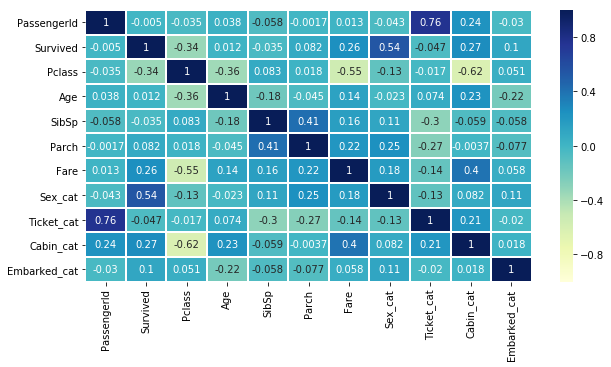

In [226]:
plt.rcParams['figure.figsize']=(10,5)
sns.heatmap(train.corr(), vmin=-1., vmax=1., annot=True, linewidths=1, cmap="YlGnBu",);

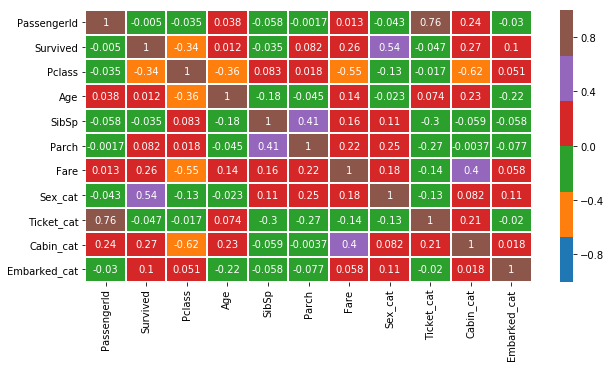

In [228]:
plt.rcParams['figure.figsize']=(10,5)
sns.heatmap(train.corr(), vmin=-1., vmax=1., annot=True, linewidths=1, cmap=sns.color_palette(n_colors=6),);

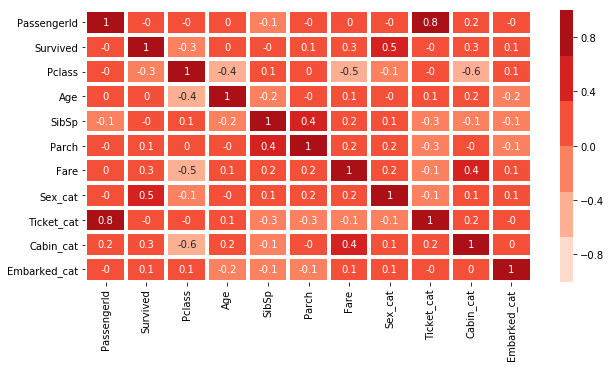

In [246]:
# plt.rcParams['figure.figsize']=(10,5)
sns.heatmap(train.corr().round(1), vmin=-1., vmax=1., annot=True, linewidths=3, cmap=sns.color_palette("Reds"), );

In [244]:
train.corr().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_cat,Ticket_cat,Cabin_cat,Embarked_cat
PassengerId,1.00,-0.01,-0.04,0.04,-0.06,-0.00,0.01,-0.04,0.76,0.24,-0.03
Survived,-0.01,1.00,-0.34,0.01,-0.04,0.08,0.26,0.54,-0.05,0.27,0.10
Pclass,-0.04,-0.34,1.00,-0.36,0.08,0.02,-0.55,-0.13,-0.02,-0.62,0.05
Age,0.04,0.01,-0.36,1.00,-0.18,-0.05,0.14,-0.02,0.07,0.23,-0.22
SibSp,-0.06,-0.04,0.08,-0.18,1.00,0.41,0.16,0.11,-0.30,-0.06,-0.06
Parch,-0.00,0.08,0.02,-0.05,0.41,1.00,0.22,0.25,-0.27,-0.00,-0.08
Fare,0.01,0.26,-0.55,0.14,0.16,0.22,1.00,0.18,-0.14,0.40,0.06
Sex_cat,-0.04,0.54,-0.13,-0.02,0.11,0.25,0.18,1.00,-0.13,0.08,0.11
Ticket_cat,0.76,-0.05,-0.02,0.07,-0.30,-0.27,-0.14,-0.13,1.00,0.21,-0.02
Cabin_cat,0.24,0.27,-0.62,0.23,-0.06,-0.00,0.40,0.08,0.21,1.00,0.02


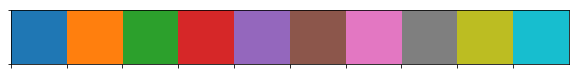

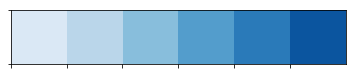

In [233]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

sns.palplot(sns.color_palette("Blues"))